# Plotting Banknote Prediction

This notebook is a tutorial of how we can modify the predictor python script to show a visualization of the data in the hidden space and how the predictor classifies each point. Each dimension of the hidden space corresponds to a neuron from the predictor. Because only three neurons are used for the banknote data, we can plot it in the hidden space.
The banknote data is used to distinguish genuine and forged banknotes.
*Note: This isn't part of Daimensions. We are going to manually edit the python script to output a png of the model's results in the hidden space.


## 1. Build Predictor

In [2]:
! ./btc_linux https://www.openml.org/data/get_csv/1586223/php50jXam -f NN --yes -e 10

Brainome Daimensions(tm) 0.97 Copyright (c) 2019, 2020 by Brainome, Inc. All Rights Reserved.
Licensed to: Ariana Park
Expiration date: 2020-11-30 (131 days left)
Number of threads: 1
Maximum file size: 4GB
Connected to: https://beta.brainome.ai:8080

Running btc will overwrite existing a.py. OK? [y/N] yes
Download from https://www.openml.org/data/get_csv/1586223/php50jXam overwrites existing file php50jXam.csv. OK? [y/N] yes
Input: php50jXam.csv
Sampling...done.
Cleaning...done.
Note: Class labels required remapping onto contiguous integers. Mapped as follows: {'1': 0, '2': 1}
Splitting into training and validation...done.
Pre-training measurements...done.
Data:
Number of instances: 1372
Number of attributes: 4
Number of classes: 2
Class balance: 55.54% 44.46%

Learnability:
Best guess accuracy: 55.54%
Capacity progression (# of decision points): [2, 7, 7, 8, 10, 10]
Decision Tree: 44 parameters
Estimated Memory Equivalent Capacity for Neural Networks: 37 parameters

Risk that model n

## 2. Make Changes to Python Script

The previous line of code should output a python script 'a.py' with the model's predictor. Next, we'll manually edit the code by adding and removing a few lines so that it will output the desired png when we run -validate. I'll show you the section of code we'll change with the modified lines highlighted.

In [ ]:
# Classifier
def single_classify(row, ax):
    x = row
    o = [0] * num_output_logits
    h_0 = max((((-22.079895 * float(x[0]))+ (-15.1198225 * float(x[1]))+ (-5.914762 * float(x[2]))+ (-2.156884 * float(x[3]))) + 10.891173), 0)
    h_1 = max((((2.4272702 * float(x[0]))+ (5.21773 * float(x[1]))+ (4.5376763 * float(x[2]))+ (1.6435318 * float(x[3]))) + -1.4549569), 0)
    h_2 = max((((3.2089252 * float(x[0]))+ (-8.139707 * float(x[1]))+ (11.706116 * float(x[2]))+ (-4.6293216 * float(x[3]))) + 0.7604494), 0)
    o[0] = (3.3051527 * h_0)+ (-0.9237582 * h_1)+ (-1.8347793 * h_2) + 7.872639
    ax.scatter(h_0, h_1, h_2, marker=('o' if o[0] >= 0 else '^'), c=('r' if o[0] >= 0 else 'b'))
    if num_output_logits == 1:
        return o[0] >= 0
    else:
        return argmax(o)


#for classifying batches
def classify(arr):
    outputs = []
    for row in arr:
        outputs.append(single_classify(row))
#removed four lines here**
    return outputs

def Validate(cleanvalfile):
    #Binary
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if n_classes == 2:
        with open(cleanvalfile, 'r') as valcsvfile:
            count, correct_count, num_TP, num_TN, num_FP, num_FN, num_class_1, num_class_0 = 0, 0, 0, 0, 0, 0, 0, 0
            valcsvreader = csv.reader(valcsvfile)
            for valrow in valcsvreader:
                if len(valrow) == 0:
                    continue
                if int(single_classify(valrow[:-1], ax)) == int(float(valrow[-1])):
                    correct_count += 1
                    if int(float(valrow[-1])) == 1:
                        num_class_1 += 1
                        num_TP += 1
                    else:
                        num_class_0 += 1
                        num_TN += 1
                else:
                    if int(float(valrow[-1])) == 1:
                        num_class_1 += 1
                        num_FN += 1
                    else:
                        num_class_0 += 1
                        num_FP += 1
                count += 1
                ax.set_xlabel('h0')
                ax.set_ylabel('h1')
                ax.set_zlabel('h2')
                plt.savefig('bank_note_authentication.png')
        return count, correct_count, num_TP, num_TN, num_FP, num_FN, num_class_1, num_class_0

    #Multiclass
    else:
        with open(cleanvalfile, 'r') as valcsvfile:
            count, correct_count = 0, 0
            valcsvreader = csv.reader(valcsvfile)
            numeachclass = {}
            preds = []
            y_trues = []
            for i, valrow in enumerate(valcsvreader):
                pred = int(single_classify(valrow[:-1]))
                preds.append(pred)
                y_true = int(float(valrow[-1]))
                y_trues.append(y_true)
                if len(valrow) == 0:
                    continue
                if pred == y_true:
                    correct_count += 1
                #if class seen, add to its counter
                if y_true in numeachclass.keys():
                    numeachclass[y_true] += 1
                #initialize a new counter
                else:
                    numeachclass[y_true] = 0
                count += 1
        return count, correct_count, numeachclass, preds,  y_trues

## 3. Run -validate

You can make this modification in your own python script most easily by replacing lines 317-395 with the code above. Below I'm using an already modified version of the script called 'a_mod.py', but you would use your edited 'a.py'. We simply have to run the following line of code and it will output our desired png. 

In [3]:
! python3 a_mod.py php50jXam.csv -validate

Classifier Type:                    Neural Network
System Type:                        Binary classifier
Best-guess accuracy:                55.53%
Model accuracy:                     100.00% (1372/1372 correct)
Improvement over best guess:        44.47% (of possible 44.47%)
Model capacity (MEC):               19 bits
Generalization ratio:               72.21 bits/bit
Model efficiency:                   2.34%/parameter
System behavior
True Negatives:                     55.54% (762/1372)
True Positives:                     44.46% (610/1372)
False Negatives:                    0.00% (0/1372)
False Positives:                    0.00% (0/1372)
True Pos. Rate/Sensitivity/Recall:  1.00
True Neg. Rate/Specificity:         1.00
Precision:                          1.00
F-1 Measure:                        1.00
False Negative Rate/Miss Rate:      0.00
Critical Success Index:             1.00


Your current directory should now have a png called 'bank_note_authentication.png' in it that looks like the following:
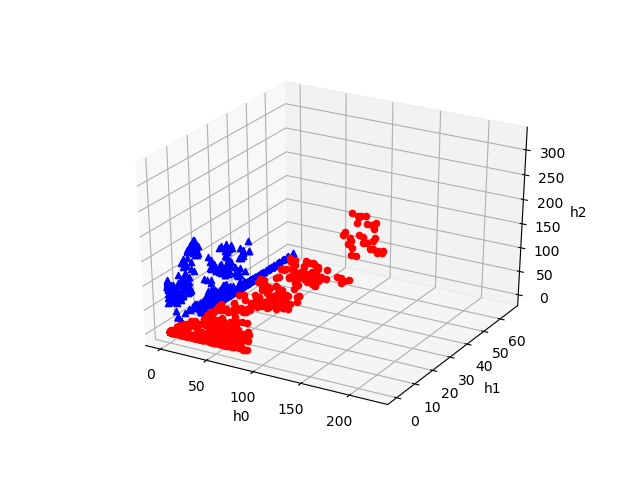

Here we see the 3D hidden space that corresponds to the three neurons the model uses. The blue triangles represent data points that are classified as forgeries; and the red circles are data points that are classified as authentic. Because our model is 100% accurate, there is a clear plane separating the two classifications. This is the plane that the predictor uses to distinguish between the two classes.